# Alter the surface from the difference between two Leica surface scans

Here we attempt to build off the methods we've have discussed elsewhere with the hope of finding the difference between two Leica surface scans, and fitting Zernike Coefficients to this difference.  These can, in turn, be used to command the Active Surface.

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

### Import all our helpr functions

In [2]:
from main import *

### Choose our spacing and smooth the original data
This function combines the steps we've seen before of 
   * importing the data from CSV file
   * converting to spherical coordinates
   * smoothing the data
   * converting back to cartesian coordinates

In [3]:
%%time
n = 100
fn1 = "data/randomSampleSta10.csv"
#fn1 = "data/randomSampleSta10.csv"
x1, y1, z1 = smoothSpherical(fn1, n)


importing CSV data ...
Converting to spherical coords ...
min/max lats (radians) -1.427986415093525 -0.015847818784296374
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.0861676844429624 4.1972234265367
lats range (radians) 0 6.28318530718
smoothing data ...
[########################################] | 100% Completed | 39.5s
converting back to cartesian ...
min/max az (radians) -1.427986415093525 -0.015847818784296374
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.0861676844429624 4.1972234265367
az range (radians) 0 6.28318530718
CPU times: user 10.9 s, sys: 1.18 s, total: 12.1 s
Wall time: 49 s


### Choose a second scan and do the same

In [4]:
%%time
#fn2 = "data/randomSampleSta10.csv"
#fn2 = "data/randomSampleBumpScan14pnts6m.csv"
fn2 = "data/randomSampleBumpScan14.csv"
#x2, y2, z2 = smoothSpherical(fn2, n, addBump=True)
x2, y2, z2 = smoothSpherical(fn2, n)

importing CSV data ...
Converting to spherical coords ...
min/max lats (radians) -1.4279918611360656 -0.015847954590523333
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.0862061044101097 4.19726729974148
lats range (radians) 0 6.28318530718
smoothing data ...
[########################################] | 100% Completed | 40.0s
converting back to cartesian ...
min/max az (radians) -1.4279918611360656 -0.015847954590523333
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.0862061044101097 4.19726729974148
az range (radians) 0 6.28318530718
CPU times: user 11.5 s, sys: 841 ms, total: 12.3 s
Wall time: 49.4 s


### Examine our new surfaces
Note that they are unevenly spaced in x, y

<IPython.core.display.Javascript object>


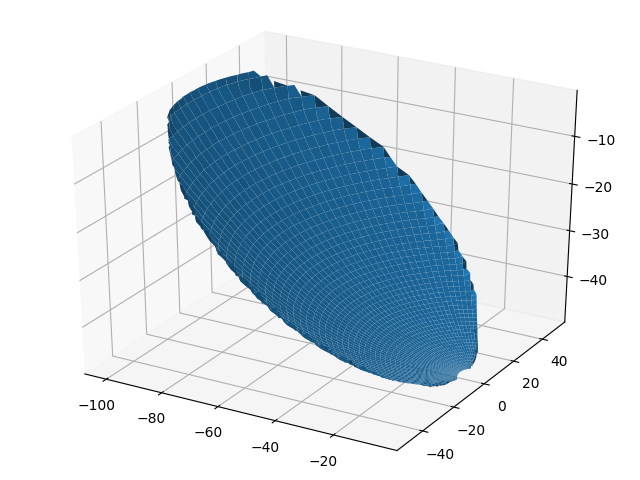

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x1, y1, z1)

<IPython.core.display.Javascript object>


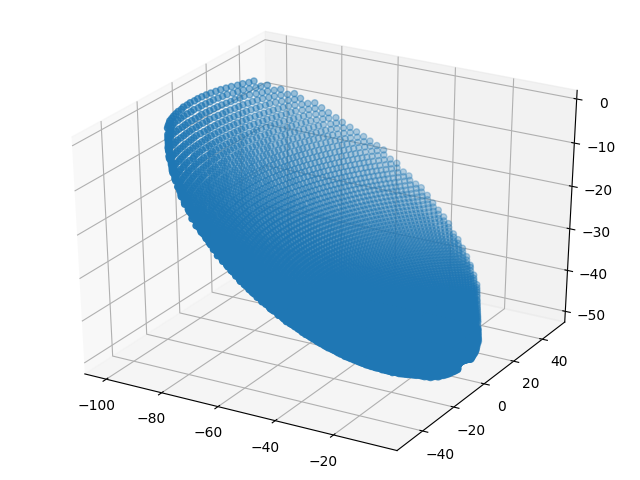

In [31]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x1, y1, z1)

<IPython.core.display.Javascript object>


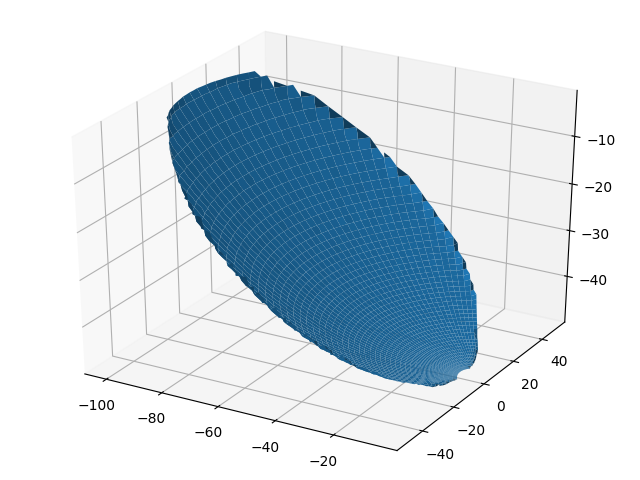

In [32]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x2, y2, z2)

<IPython.core.display.Javascript object>


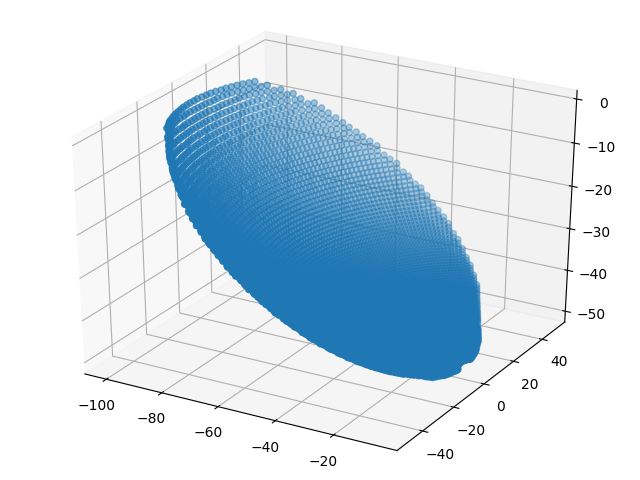

In [33]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x2, y2, z2)

### We have to deal with the ground in the second scan
We'll just set them to NaNs

In [9]:
from copy import copy
z2org = copy(z2)

In [10]:
#z2[z2 < -65.] = np.nan

In [11]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x2, y2, z2)

<IPython.core.display.Javascript object>

### Interpolate both surfaces using the same x, y spacing
We need to interpolate these surfaces so that they are evenly
spaced in x, y - it makes things like fitting the surface to Zernikes possible.
But what we really want to do is find the difference between these surfaces, 
which is best done if they are identical in x and y.
So, we do a 2 dimensional interpolation using the same x and y grid, based off
the maximum and minimum dimensions.

In [12]:
    # interpolate both surfaces using the same xyz grid
    x1max = np.nanmax(x1)
    x1min = np.nanmin(x1)
    x2max = np.nanmax(x2)
    x2min = np.nanmin(x2)
    xrange = (min(x1min, x2min), max(x1max, x2max))
    y1max = np.nanmax(y1)
    y1min = np.nanmin(y1)
    y2max = np.nanmax(y2)
    y2min = np.nanmin(y2)
    yrange = (min(y1min, y2min), max(y1max, y2max))
    print xrange, yrange

(-100.90210457991265, -5.511877237258143) (-48.82957608666157, 49.02665343785512)


### Interpolate just center region of surface
We've really been faking it - we actually don't know what we're doing.  Case in point - we haven't yet figured out how to do the 2D interpolation while taking NaNs and edge effects into account, so for now we cheat and just fit to the center region of the surface.

In [13]:
%%time
sx1, sy1, sz1 = interpXYZ(x1, y1, z1, n, xrange=xrange, yrange=yrange, checkLevels=True, center=True)
  

Removed 1673 NaNs from 10000 data points
CPU times: user 27.7 s, sys: 101 ms, total: 27.8 s
Wall time: 27.7 s


In [14]:
%%time
sx2, sy2, sz2 = interpXYZ(x2, y2, z2, n, xrange=xrange, yrange=yrange, checkLevels=True, center=True)

Removed 1675 NaNs from 10000 data points
Replacing values greater then original with NaNs
Replacing values less then original with NaNs
CPU times: user 23.5 s, sys: 7.48 ms, total: 23.5 s
Wall time: 23.5 s


### Check the new (inner) surfaces

<IPython.core.display.Javascript object>


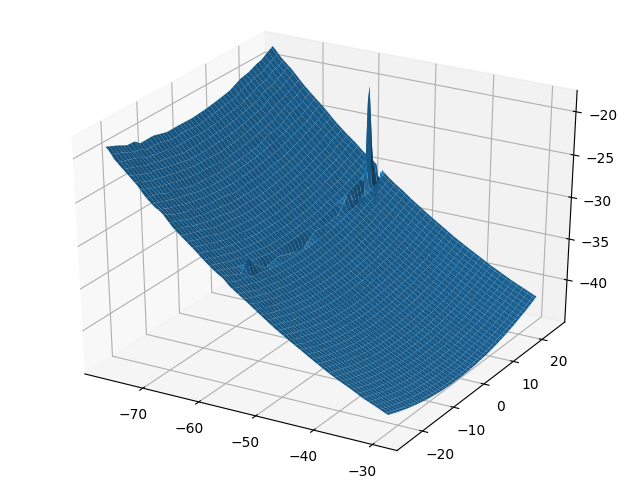

In [24]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(sx1, sy1, sz1)

<IPython.core.display.Javascript object>


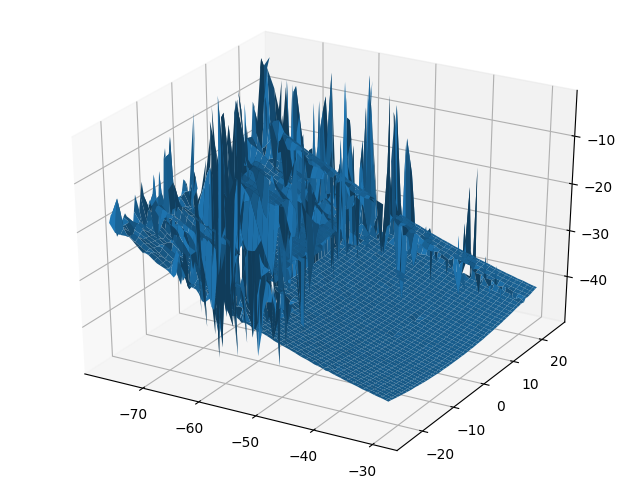

In [25]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(sx2, sy2, sz2)

### Check that indeed the x, y grids are the same

In [17]:
print (sx1 == sx2).all()
print (sy1 == sy2).all()

True
True


### Now we can find the difference between the two surfaces!

In [18]:
zdiff = sz1 - sz2


<IPython.core.display.Javascript object>


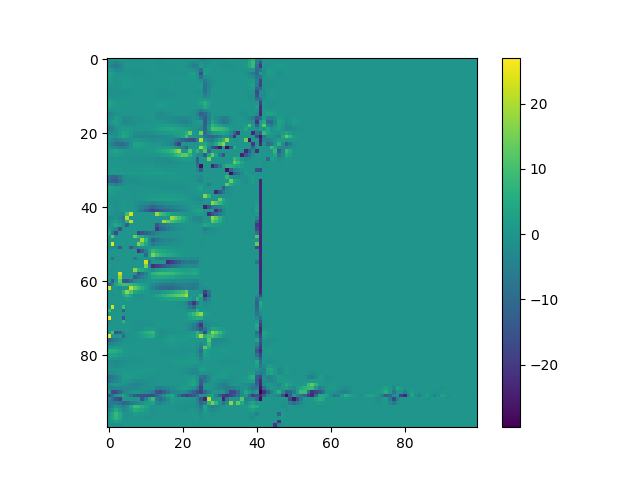

In [23]:
fig, ax = plt.subplots()
img = ax.imshow(zdiff)
cbar = ax.figure.colorbar(img, ax=ax)

### Fit this to Zernikes

<IPython.core.display.Javascript object>


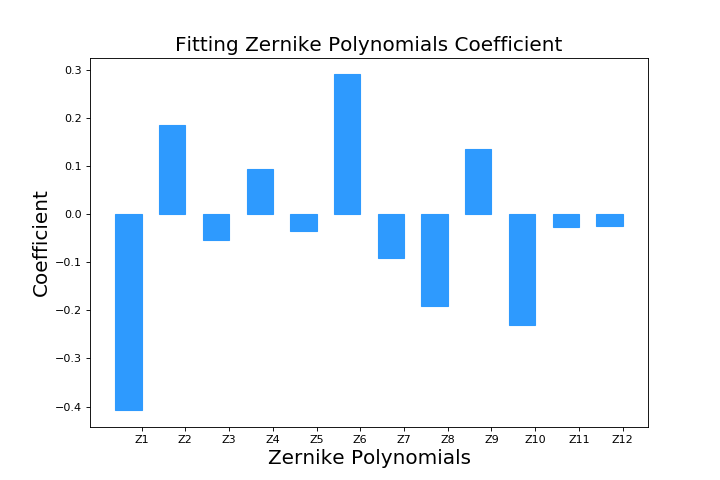

<IPython.core.display.Javascript object>


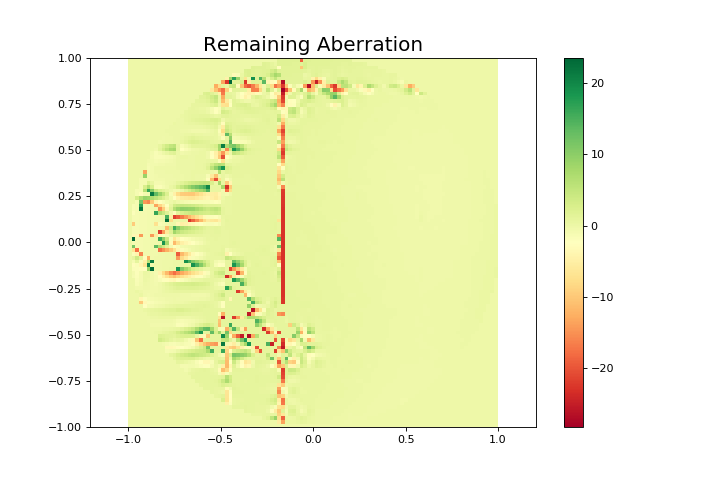

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 | 0.185 |-0.053 | 0.093 |-0.035 | 0.290 |-0.092 |-0.192 | 0.134 |-0.231 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.027 |-0.025 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

<IPython.core.display.Javascript object>


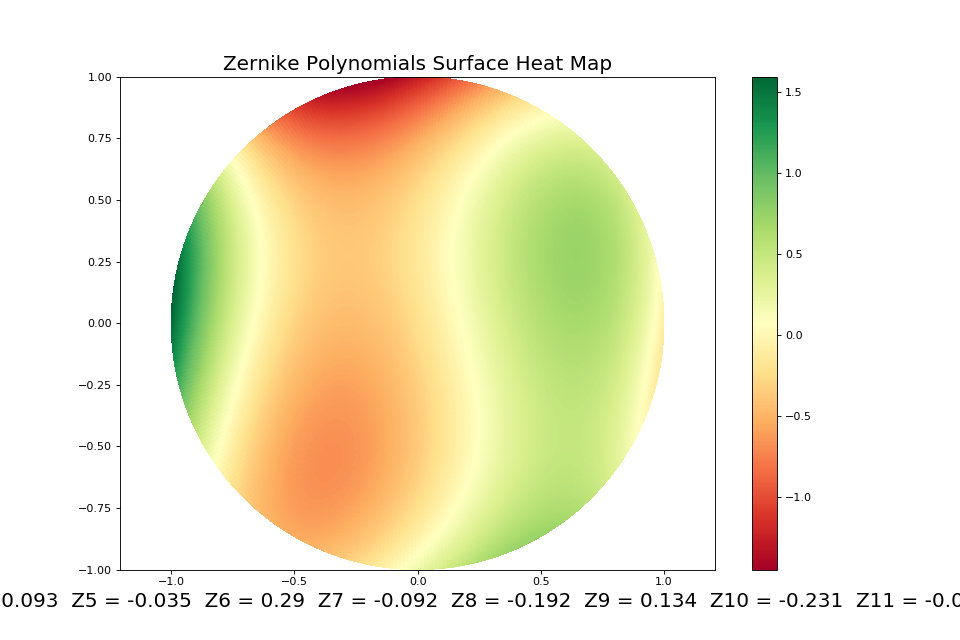

Z2 =  0.185 Z11 x Tilt
Z3 =  -0.053 Z11 y Tilt
Z4 =  0.093 Z20 Defocus
Z5 =  -0.035 Z22 Primary Astigmatism at 45
Z6 =  0.29 Z22 Primary Astigmatism at 0
Z7 =  -0.092 Z31 Primary y Coma
Z8 =  -0.192 Z31 Primary x Coma
Z9 =  0.134 Z33 y Trefoil
Z10 =  -0.231 Z33 x Trefoil
Z11 =  -0.027 Z40 Primary Spherical
Z12 =  -0.025 Z42 Secondary Astigmatism at 0


In [26]:
zdiffOrg = copy(zdiff)
zdiff[np.isnan(zdiff)] = 0.
fits, c = zernikeFit(zdiff)

In [21]:
c.listcoefficient()

Z2 =  0.185 Z11 x Tilt
Z3 =  -0.053 Z11 y Tilt
Z4 =  0.093 Z20 Defocus
Z5 =  -0.035 Z22 Primary Astigmatism at 45
Z6 =  0.29 Z22 Primary Astigmatism at 0
Z7 =  -0.092 Z31 Primary y Coma
Z8 =  -0.192 Z31 Primary x Coma
Z9 =  0.134 Z33 y Trefoil
Z10 =  -0.231 Z33 x Trefoil
Z11 =  -0.027 Z40 Primary Spherical
Z12 =  -0.025 Z42 Secondary Astigmatism at 0


['Z2 = 0.185\nZ3 = -0.053\nZ4 = 0.093\nZ5 = -0.035\nZ6 = 0.29\nZ7 = -0.092\nZ8 = -0.192\nZ9 = 0.134\nZ10 = -0.231\nZ11 = -0.027\nZ12 = -0.025\n',
 'Z2 = 0.185  Z3 = -0.053  Z4 = 0.093  Z5 = -0.035  Z6 = 0.29  Z7 = -0.092  Z8 = -0.192  Z9 = 0.134  Z10 = -0.231  Z11 = -0.027  Z12 = -0.025  ']

### Convert the coefficients from Noll to ANSI
Recall that opticspy works in Noll notation, while the Active Surface Manager seems to work in a modified version of ANSI (offset by one, phase rotated by 90 degrees)

### Send these Coefficients to the Active Surface Manager

The Active Surface Manager has the zernike_coeff parameter (indexes 1 through N).  When these are set, the manager can use them to compute the displacement of each individual actuator.

In [27]:
zdl = np.log(abs(zdiff))

In [28]:
zdl = np.log(np.absolute(zdiff))

<IPython.core.display.Javascript object>


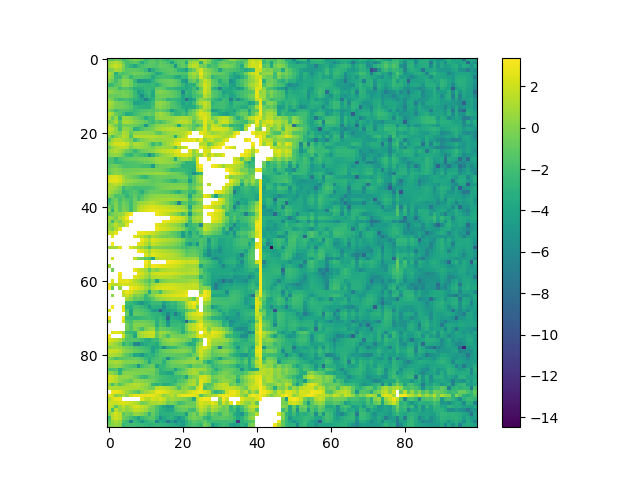

In [29]:
fig, ax = plt.subplots()
img = ax.imshow(zdl)
cbar = ax.figure.colorbar(img, ax=ax)